In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset"

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
classes = os.listdir(dir_path)
print(classes)

['test_set', 'train_set', 'vegetable.h5']


In [4]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set"
classes = os.listdir(dir_path)
print(classes)

['Potato___Late_blight', 'Potato___Early_blight', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Tomato___Leaf_Mold', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot']


In [5]:
dir_path = "/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set"
classes = os.listdir(dir_path)
print(classes)

['Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Potato___healthy', 'Pepper,_bell___Bacterial_spot', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Pepper,_bell___healthy']


In [6]:
train = "/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set" 
test = "/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set"

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
x_train=train_datagen.flow_from_directory(train,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)
x_test=test_datagen.flow_from_directory(test,target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 11398 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [10]:
model=Sequential()

In [11]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [12]:
model=load_model('/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/vegetable.h5')

In [13]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/bb07a1b7-b9ad-4016-a013-9ff0e4636d4a___RS_Early.B 7156.JPG")

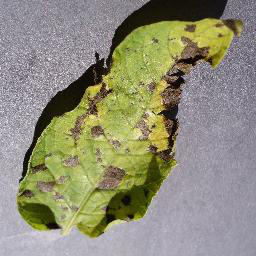

In [14]:
img

In [15]:
x=image.img_to_array(img)

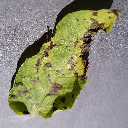

In [16]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Potato___Early_blight/bb07a1b7-b9ad-4016-a013-9ff0e4636d4a___RS_Early.B 7156.JPG",target_size=(128,128))
img

In [17]:
x=image.img_to_array(img)

In [18]:
x

array([[[140., 138., 151.],
        [142., 140., 153.],
        [127., 125., 138.],
        ...,
        [ 80.,  76.,  90.],
        [112., 108., 122.],
        [121., 117., 131.]],

       [[152., 150., 163.],
        [129., 127., 140.],
        [135., 133., 146.],
        ...,
        [119., 115., 129.],
        [106., 102., 116.],
        [148., 144., 158.]],

       [[149., 147., 160.],
        [152., 150., 163.],
        [143., 141., 154.],
        ...,
        [140., 136., 150.],
        [133., 129., 143.],
        [104., 100., 114.]],

       ...,

       [[188., 186., 199.],
        [190., 188., 201.],
        [177., 175., 188.],
        ...,
        [156., 154., 168.],
        [155., 153., 167.],
        [149., 147., 161.]],

       [[183., 181., 194.],
        [178., 176., 189.],
        [174., 172., 185.],
        ...,
        [153., 151., 165.],
        [149., 147., 161.],
        [142., 140., 154.]],

       [[187., 185., 198.],
        [184., 182., 195.],
        [179., 1

In [19]:
x=np.expand_dims(x,axis=0)

In [20]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 456ms/step


In [21]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [22]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato__Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [23]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [27]:
img=image.load_img(r"/content/drive/MyDrive/IBM/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Septoria_leaf_spot/c280146e-f898-446c-a1e2-af20cc2b0251___Keller.St_CG 1884.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

1/1 [==============================] - 0s 53ms/step


In [28]:
test_datagen_1=ImageDataGenerator(rescale=1)
test_generator_1=test_datagen_1.flow_from_directory(
    test,
    target_size=(128,128),
    batch_size=20,
    class_mode='categorical'
)

Found 3416 images belonging to 9 classes.


In [29]:
model.evaluate(test_generator_1,steps=50)

50/50 [==============================] - 134s 3s/step - loss: 1727.5413 - accuracy: 0.3280


[1727.541259765625, 0.328000009059906]